# Course 1 - Intro

此 notebook 用于存储和练习 TensorFlow Developer Certificate 课程相关内容<br>
https://www.coursera.org/professional-certificates/tensorflow-in-practice

## 最简单的 neural network

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [11]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)
#最简单的neural net，一个layer，一个unit（也就是一个neuron）
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# sgd = stochastic gradient descent
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 32.7426
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 26.0851
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 20.8406
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 16.7079
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 13.4502
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 10.8808
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 8.8533
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 7.2521
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9864
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 4.9849
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 4.1913
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 3.5614
Epoch 13/500
1/1 [==============================] - 0s

In [12]:
print(model.predict([10.0]))

[[18.978647]]


## 简单的 computer vision 神经网络模型

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32  60   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 216 144  43
    0   0   0   0   0   0   0  91  54   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  27 172 200 

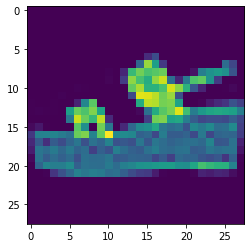

In [48]:
import matplotlib.pyplot as plt
plt.imshow(train_images[12])
# image的pixel数值范围是 0，255
print(train_labels[12])
print(train_images[12])

In [49]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [55]:
model = keras.Sequential(
[
    #第一层layer，使用Flatten把一个个28*28 pixel的图片数据变成线性数值
    keras.layers.Flatten(input_shape=(28,28)),
    #第二层就是hidden layer，里面的数值代表neuron数量
    keras.layers.Dense(1024,activation=tf.nn.relu),
    #第三层layer，数值10表示数据库中输出的图片有10个类别（比如靴子，T恤，裤子等等）
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

In [56]:
model.compile(#optimizer=tf.train.AdamOptimizer(), #这一行是v1版本中的代码
             #optimizer=tf.optimizers.Adam(), #v2版本可用
             optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy'
             )
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4703
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3584
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3188
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2954
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2767


In [39]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3294


0.32938075065612793

In [46]:
classifications = model.predict(test_images)
print(classifications[0])

[1.4223087e-07 5.5423164e-09 8.4919890e-08 2.9905627e-09 2.9066207e-08
 5.2441115e-04 2.6461586e-07 1.6386388e-02 3.9798568e-08 9.8308867e-01]


In [45]:
np.sort(classifications[0],axis=None)

array([2.9905627e-09, 5.5423164e-09, 2.9066207e-08, 3.9798568e-08,
       8.4919890e-08, 1.4223087e-07, 2.6461586e-07, 5.2441115e-04,
       1.6386388e-02, 9.8308867e-01], dtype=float32)

In [41]:
print(test_labels[0])

9


In [59]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if logs.get('loss') < 0.4:
            print('\n已经达到60%准确率，训练取消。')
            self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4695
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3595
已经达到60%准确率，训练取消。
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3593


In [61]:
def train_mnist():

    # YOUR CODE
    import tensorflow as tf

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            #if(logs.get('acc')>0.99): #此处的 'acc' 适用于 tensorflow 1.x
            if(logs.get('accuracy')>0.99): # 'accuracy' 适用于 tensorflow 2.x
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    callbacks = myCallback()

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    #return history.epoch, history.history['acc'][-1]
    return history.epoch, history.history['accuracy'][-1] # 同理 acc对应1.x版本；accuracy对应2.x版本

train_mnist()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2006 - accuracy: 0.9407: 0s - loss: 0.208
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9917
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0267 - accuracy: 0.9918


([0, 1, 2, 3, 4], 0.9917500019073486)

## 卷积神经网络 convolution nn 和 pooling

In [68]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.95:
            print('\n已经达到95%准确率，训练结束。')
            self.model.stop_training = True
callbacks = myCallback()    
    
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#因为使用了卷积，所以此处要对数据进行reshape，下同
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
#因为使用了卷积，所以此处要对数据进行reshape
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
    # 64意味着使用64个filter，每个filter是3*3的大小。input_shape最后一个数1代表数据的color depth是1，因为都是灰度图片
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    
]
)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

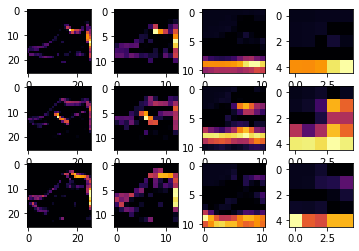

In [67]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [72]:
#cv2就是opencv，在python3中pip安装包的名字是opencv-python进行安装
import cv2
import numpy as np
from scipy import misc
# 一个工具包内自带的图片，可用于训练
i = misc.ascent()

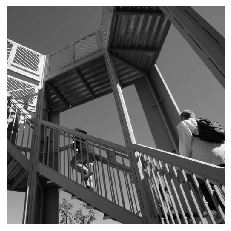

In [74]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [77]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [88]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [89]:
for x in range(1,size_x - 1):
    for y in range(1,size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x+1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255
        i_transformed[x, y] = convolution

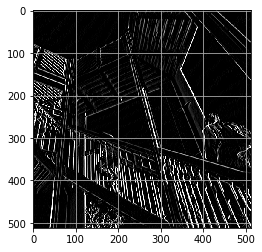

In [90]:
plt.gray()
plt.grid('off')
plt.imshow(i_transformed)
plt.show()

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

<function matplotlib.pyplot.show(*args, **kw)>

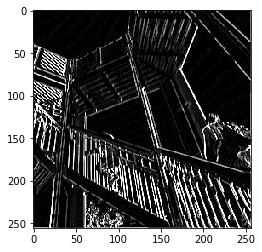

In [93]:
'''pooling 版本'''

new_x = int(size_x / 2)
new_y = int(size_y / 2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        #下面四行代表一个 (2,2) 的pooling，也就是一个4个点组成的grid
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2), int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show

## ImageGenerator

In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']
['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']


In [8]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

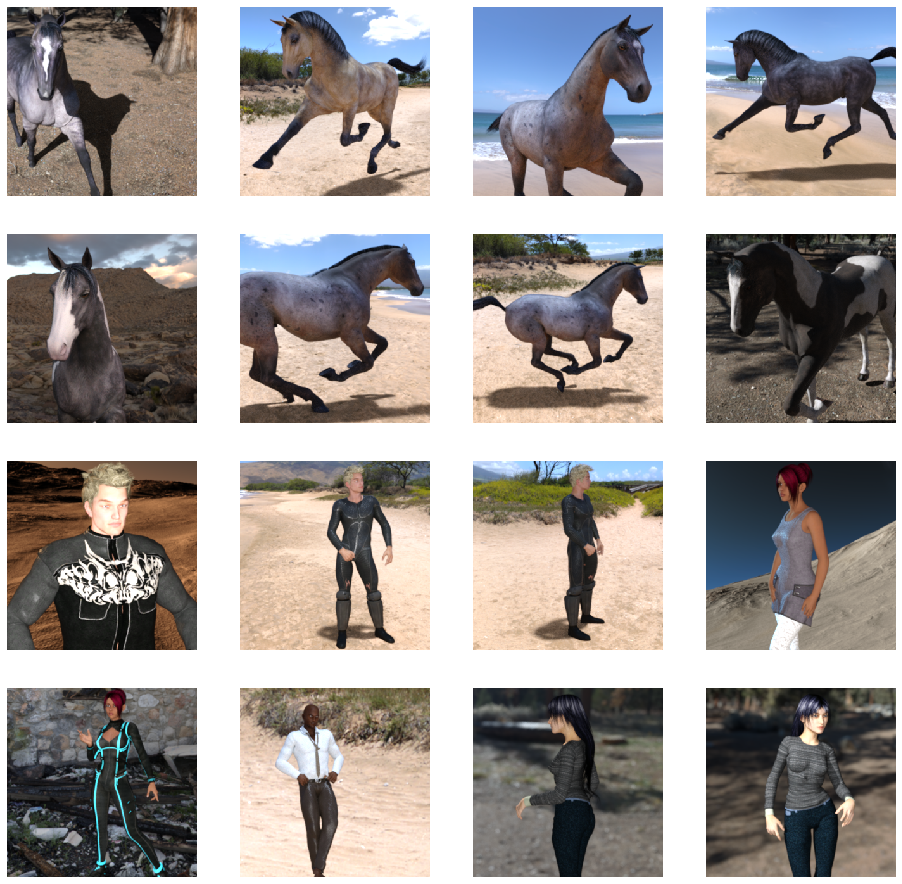

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy']
             )

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    './tmp/horse-or-human/',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    './tmp/validation-horse-or-human/',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [18]:
hisory = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 16s 2s/step - loss: 0.7881 - accuracy: 0.5547 - val_loss: 0.6083 - val_accuracy: 0.8555
Epoch 2/15
8/8 [==============================] - 22s 3s/step - loss: 0.6469 - accuracy: 0.7048 - val_loss: 0.6622 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 0.6561 - accuracy: 0.5859 - val_loss: 0.4491 - val_accuracy: 0.8906
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 0.4942 - accuracy: 0.8086 - val_loss: 1.0641 - val_accuracy: 0.8047
Epoch 5/15
8/8 [==============================] - 18s 2s/step - loss: 0.3147 - accuracy: 0.8945 - val_loss: 0.9719 - val_accuracy: 0.8086
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 0.7955 - accuracy: 0.8018 - val_loss: 0.6873 - val_accuracy: 0.8008
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.2297 - accuracy: 0.9062 - val_loss: 0.7664 - val_accuracy: 0.8438
Epoch 8/15
8/8 [==================

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path = '.tmp/test/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")
 

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/Users/xiucat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


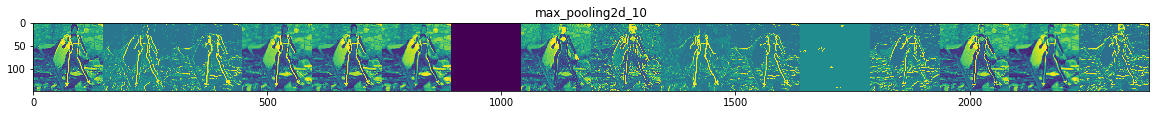

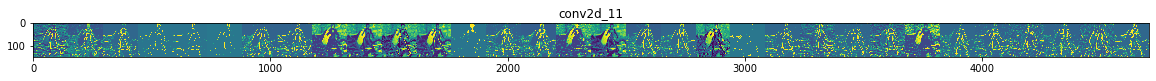

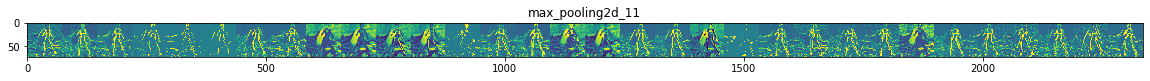

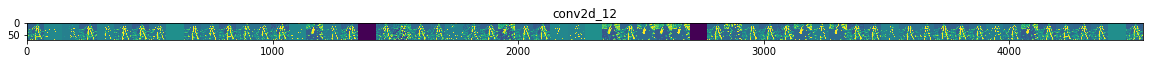

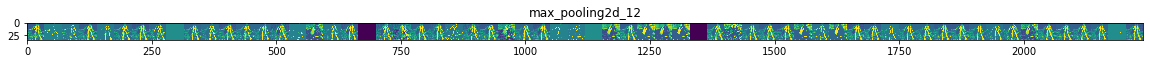

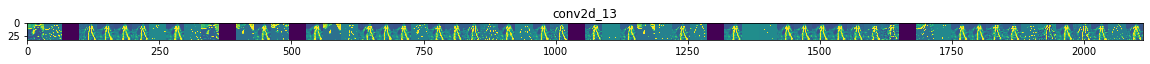

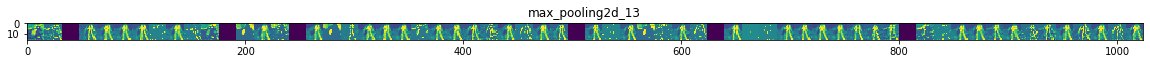

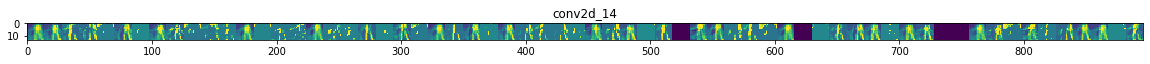

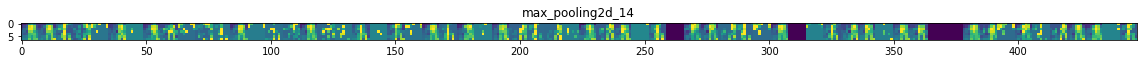

In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Course 2 - Convolution Neural Network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    '../Data/dogs-vs-cats_train/',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '../Data/dogs-vs-cats_validation/',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

from tensorflow.keras.optimizers import RMSprop
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [3]:
'''Course2 Week1, Working through the notebook 看到 2:13'''

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)

Epoch 1/15
100/100 [==============================] - 46s 460ms/step - loss: 2.6478e-09 - accuracy: 1.0000 - val_loss: 7.3138e-11 - val_accuracy: 1.0000
Epoch 2/15
100/100 [==============================] - 46s 464ms/step - loss: 1.7640e-11 - accuracy: 1.0000 - val_loss: 1.1549e-11 - val_accuracy: 1.0000
Epoch 3/15
 59/100 [================>.............] - ETA: 17s - loss: 1.6813e-10 - accuracy: 1.0000

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

## dogs-vs-cats augmentation

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = '../Data/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 1e-4),
    metrics = ['accuracy']
)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=1,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

model.save('my_model')
model.save('my_h5_model.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
100/100 [==============================] - 47s 468ms/step - loss: 0.6941 - accuracy: 0.5355 - val_loss: 0.6774 - val_accuracy: 0.6060
INFO:tensorflow:Assets written to: my_model/assets


In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4
pic_index = 0

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


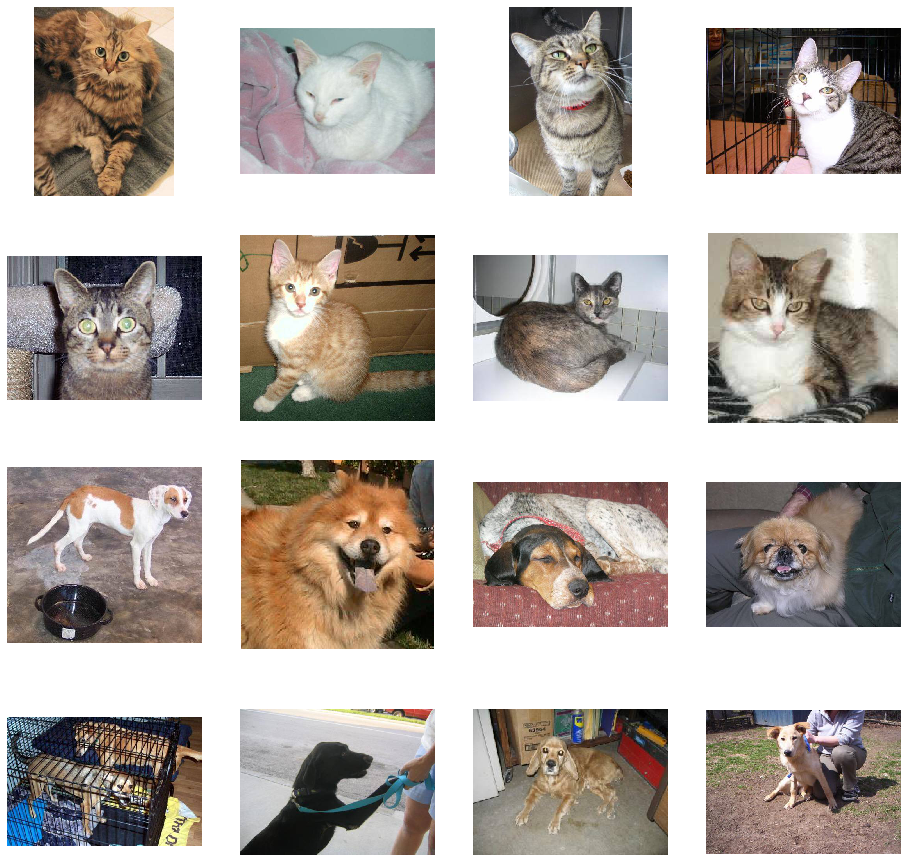

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## 使用 filtered 猫狗图包进行plot，看train和validation的曲线图

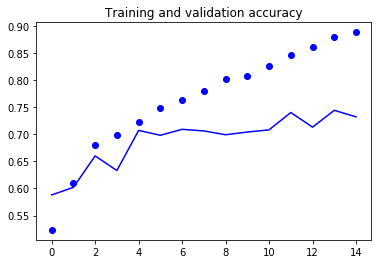

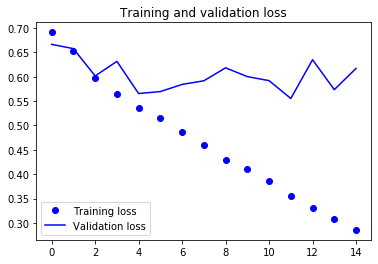

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Augmentation 对少量数据集进行增强的方法

In [ ]:
import tensorflow as tf
from tensorflow.keras.preproccessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2, #避免因为dataset中对象都在相似位置（比如居中）而导致overfitting
    height_shift_Range = 0.2, #同上
    shear_range = 0.2, #变形
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = '../Data/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(lr = 1e-4),
    metrics = ['accuracy']
)

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 [==============================] - 121s 1s/step - loss: 0.6930 - accuracy: 0.5325 - val_loss: 0.6839 - val_accuracy: 0.5970
Epoch 2/15
100/100 [==============================] - 112s 1s/step - loss: 0.6858 - accuracy: 0.5550 - val_loss: 0.6731 - val_accuracy: 0.5920
Epoch 3/15
100/100 [==============================] - 125s 1s/step - loss: 0.6755 - accuracy: 0.5865 - val_loss: 0.6523 - val_accuracy: 0.6360
Epoch 4/15
100/100 [==============================] - 128s 1s/step - loss: 0.6589 - accuracy: 0.6150 - val_loss: 0.6393 - val_accuracy: 0.6220
Epoch 5/15
100/100 [==============================] - 109s 1s/step - loss: 0.6464 - accuracy: 0.6325 - val_loss: 0.6329 - val_accuracy: 0.6350
Epoch 6/15
100/100 [==============================] - 129s 1s/step - loss: 0.6313 - accuracy: 0.6440 - val_loss: 0.6213 - val_accuracy: 0.6410
Epoch 7/15
100/100 [==============================] - 134s

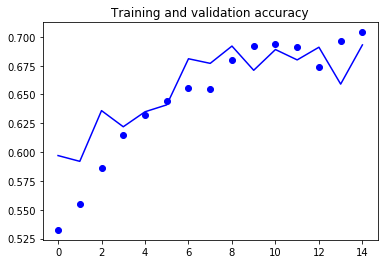

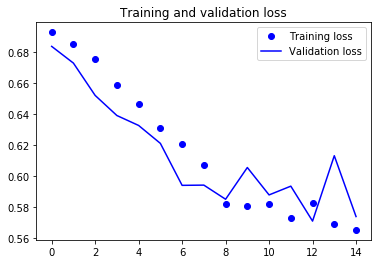

In [2]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Transfer Learning 迁移学习

In [24]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
#pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_192[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [26]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output


In [27]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x) # 加入 dropout，避免相邻neuron的weight过度相似导致overfitting
x = layers.Dense(1, activation = 'sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy' ,metrics = ['acc'])

In [28]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [29]:
train_generator = train_datagen.flow_from_directory(
    '../Data/cats-v-dogs/training/',
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

validation_generator = validation_datagen.flow_from_directory(
    '../Data/cats-v-dogs/testing/',
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [30]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    verbose = 1,
    steps_per_epoch = 100,
    epochs = 50,
    validation_steps = 50
)

Epoch 1/50
100/100 [==============================] - 94s 937ms/step - loss: 1.5537 - acc: 0.8285 - val_loss: 0.4628 - val_acc: 0.8733
Epoch 2/50
100/100 [==============================] - 77s 772ms/step - loss: 0.4142 - acc: 0.8980
Epoch 3/50
100/100 [==============================] - 77s 772ms/step - loss: 0.3860 - acc: 0.9030
Epoch 4/50
100/100 [==============================] - 79s 788ms/step - loss: 0.3157 - acc: 0.9110
Epoch 5/50
100/100 [==============================] - 78s 776ms/step - loss: 0.2764 - acc: 0.9185
Epoch 6/50
100/100 [==============================] - 78s 784ms/step - loss: 0.2697 - acc: 0.9205
Epoch 7/50
100/100 [==============================] - 83s 825ms/step - loss: 0.2696 - acc: 0.9215
Epoch 8/50
100/100 [==============================] - 85s 849ms/step - loss: 0.2687 - acc: 0.9250
Epoch 9/50
100/100 [==============================] - 90s 903ms/step - loss: 0.2787 - acc: 0.9215
Epoch 10/50
100/100 [==============================] - 83s 831ms/step - loss: 0.2

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

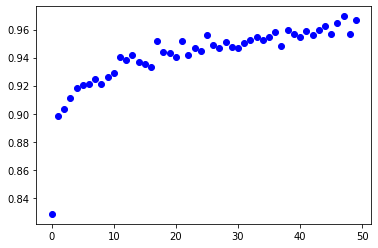

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## 多类别分类 Moving from binary to multi-class classification

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 128,
    target_size = (300,300),
    class_mode = 'categorical'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # 对于多重分类，比如类别数量为3，则将output layer的neuron数量设置为3，激活函数activation使用softmax。
    # 这样的效果是对三个类别分别取其概率，判断哪个类别概率最高。三个概率值的和为1.
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer = RMSprop(lr = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

# Course 3 - Natural Language Processing in TensorFlow

## tokenizer and pad sequences

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]
#num_word代表tokenizing过程中使用的数字数量（从0开始算）
tokenizer = Tokenizer(num_words = 6, oov_token = '<OOV>') # oov_token: out of vocabulary, 自定义的虚拟词汇，用来代替此表中没有的单词。可随意指定oov的值，比如此处为 <OOV>
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
# maxlen = 5(每个sentence的字数上限)，默认从句头删减，
# 如果需要从句末删减，可以在maxlen后面使用 truncating = 'pre'
# 如果数据中有句子的len不足maxlen，则默认在结尾加0补足
padded = pad_sequences(sequences) #, padding = 'post', maxlen = 6, truncating = 'post'

print(word_index)
print(sequences)
print(padded)



{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 1], [1, 3, 2, 4], [1, 1, 1, 2, 4, 1, 1]]
[[0 0 0 5 3 2 4]
 [0 0 0 5 3 2 1]
 [0 0 0 1 3 2 4]
 [1 1 1 2 4 1 1]]


In [2]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [15]:
import json
file = open('../Data/sarcasm.json', 'r')
datastore = []
# 因为json.loads只能读取一行，读取多行数据会报错，所以使用readlines()逐行读取然后append到list中
for line in file.readlines():
    datastore.append(json.loads(line))

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token = '<OOV>')
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
#print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding = 'pre')

print(sentences[3])
print(padded[3])
print(padded.shape)

JSONDecodeError: Expecting value: line 2 column 1 (char 2)

## IMDB dataset

In [2]:
'''IMDB dataset'''

import tensorflow as tf
#print(tf.__version__)
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

In [3]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

#在 python3 里需要 str(s.numpy())
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [4]:
# 改成 np.array 用于训练
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
training_labels_final

array([0, 0, 0, ..., 0, 0, 1])

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token =oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #把dict中key和value的位置对调
reverse_word_index

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [8]:
#embedding 把相邻词语做cluster并进行embed

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    #tf.keras.layers.Flatten(), #flatten 之后的output shape仍然很大，可以用下一行替代
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
'''看到 week 2，more into details'''

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epoch = 10
model.fit(padded,
         training_labels_final,
          epochs = num_epoch,
          validation_data = (testing_padded, testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5577 - accuracy: 0.7508 - val_loss: 0.3952 - val_accuracy: 0.8366
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3394 - accuracy: 0.8590 - val_loss: 0.3334 - val_accuracy: 0.8572
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2766 - accuracy: 0.8893 - val_loss: 0.3296 - val_accuracy: 0.8577
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2404 - accuracy: 0.9055 - val_loss: 0.3402 - val_accuracy: 0.8542
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2145 - accuracy: 0.9175 - val_loss: 0.3577 - val_accuracy: 0.8500
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1931 - accuracy: 0.9290 - val_loss: 0.3900 - val_accuracy: 0.8398
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1760 - accuracy: 0.9360 - val_loss: 0.4120 - val_accuracy: 0.8366
Epoch 

In [11]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) #embedding layer的 weight

(10000, 16)


In [19]:
import io
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [18]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')

/Users/xiucat/anaconda3/lib/python3.6/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


KeyboardInterrupt: 

## sarcasm dataset

In [2]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# sarcasm.json
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
with open('../Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [3]:
training_size = int(len(sentences)*0.7)
vocab_size = 10000
#vocab_size = 1000
embedding_dim = 16
#max_length = 120
max_length = 64
trunc_type = 'post'
oov_tok = '<OOV>'

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [4]:
'''Building a classifier for the sarcasm dataset'''

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                                truncating = trunc_type) #padding = padding_type,
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                               truncating = trunc_type) #padding = padding_type,


In [5]:
'''存在数据格式报错'''
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs = num_epochs,
                   validation_data = (testing_padded, testing_labels), verbose = 2)

Epoch 1/30
585/585 - 3s - loss: 0.6477 - accuracy: 0.6165 - val_loss: 0.5212 - val_accuracy: 0.7507
Epoch 2/30
585/585 - 2s - loss: 0.3861 - accuracy: 0.8486 - val_loss: 0.3618 - val_accuracy: 0.8490
Epoch 3/30
585/585 - 2s - loss: 0.2829 - accuracy: 0.8888 - val_loss: 0.3389 - val_accuracy: 0.8591
Epoch 4/30
585/585 - 2s - loss: 0.2300 - accuracy: 0.9094 - val_loss: 0.3379 - val_accuracy: 0.8569
Epoch 5/30
585/585 - 2s - loss: 0.1948 - accuracy: 0.9265 - val_loss: 0.3548 - val_accuracy: 0.8517
Epoch 6/30
585/585 - 2s - loss: 0.1680 - accuracy: 0.9378 - val_loss: 0.3735 - val_accuracy: 0.8484
Epoch 7/30
585/585 - 2s - loss: 0.1466 - accuracy: 0.9465 - val_loss: 0.3822 - val_accuracy: 0.8525
Epoch 8/30
585/585 - 2s - loss: 0.1286 - accuracy: 0.9540 - val_loss: 0.4103 - val_accuracy: 0.8472
Epoch 9/30
585/585 - 2s - loss: 0.1122 - accuracy: 0.9624 - val_loss: 0.4422 - val_accuracy: 0.8441
Epoch 10/30
585/585 - 2s - loss: 0.1009 - accuracy: 0.9660 - val_loss: 0.4677 - val_accuracy: 0.8409

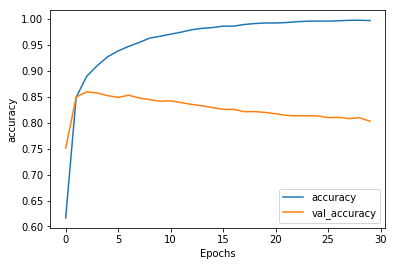

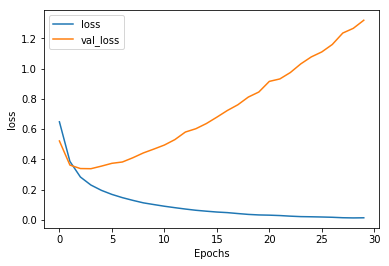

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [11]:
'''pre-tokenized datasets
tensorflow datasets
'''
#https://github.com/tensorflow/datasets/tree/master/docs/catalog

'''从tensorflow datasets下载一个imdb dataset。tfds.load自动下载'''
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)


In [12]:
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)
sample_string = 'TensorFlow, from basics to mastery'
tokenized_string = tokenizer.encode(sample_string)
print('Tokenied string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [16]:
'''展示token和原始文本的对应关系'''

for ts in tokenized_string:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))
    
'''此处的结果就是所谓的 subwords，也就是一些不完整的单词的fraction'''
'''
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y
'''

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 128

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [14]:
embedding_dim = 64
mpdel = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 10
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(train_dataset,
                   epochs = num_epochs,
                   validation_data = test_dataset)



Epoch 1/10
196/196 [==============================] - 9s 38ms/step - loss: 1.5264 - accuracy: 0.5550 - val_loss: 0.7633 - val_accuracy: 0.6130
Epoch 2/10
196/196 [==============================] - 5s 26ms/step - loss: 0.7115 - accuracy: 0.6315 - val_loss: 0.6689 - val_accuracy: 0.6468
Epoch 3/10
196/196 [==============================] - 5s 26ms/step - loss: 0.6430 - accuracy: 0.6688 - val_loss: 0.6310 - val_accuracy: 0.6723
Epoch 4/10
196/196 [==============================] - 6s 28ms/step - loss: 0.5974 - accuracy: 0.6922 - val_loss: 0.5888 - val_accuracy: 0.7076
Epoch 5/10
196/196 [==============================] - 6s 29ms/step - loss: 0.5479 - accuracy: 0.7316 - val_loss: 0.5543 - val_accuracy: 0.7322
Epoch 6/10
196/196 [==============================] - 9s 47ms/step - loss: 0.5097 - accuracy: 0.7596 - val_loss: 0.5263 - val_accuracy: 0.7508
Epoch 7/10
196/196 [==============================] - 8s 39ms/step - loss: 0.4748 - accuracy: 0.7871 - val_loss: 0.5040 - val_accuracy: 0.7634

# Course 3 Week 2 Exercise

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#作业要求：

#This week you will build on last week’s exercise where you tokenized words from the BBC news reports dataset. 
#This dataset contains articles that are classified into a number of different categories. 
#See if you can design a neural network that can be trained on this dataset to accurately determine what words 
#determine what category. Create the vecs.tsv and meta.tsv files and load them into the embedding projector.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
#    -O /tmp/bbc-text.csv

In [2]:
vocab_size = 1000 # YOUR CODE HERE
embedding_dim = 16 # YOUR CODE HERE
max_length = 120 # YOUR CODE HERE
trunc_type = 'pre' # YOUR CODE HERE
padding_type = 'post' # YOUR CODE HERE
oov_tok = '<OOV>' # YOUR CODE HERE
training_portion = .8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [4]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
    temp_s = []
    for line in csvfile.readlines()[1:]: #跳过第一行title
        labels.append(line.split(',')[0]) #使用逗号分割出labels和sentences
        temp_s.append(line.split(',')[1])

for word in temp_s:
    temp_w = []
    for ws in word.split(' '):
        ws = ws.rstrip()
        ws = ws.lstrip()
        if ws not in stopwords:
            temp_w.append(ws)
    sentences.append(' '.join(temp_w))

    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [5]:
train_size = int(len(sentences)*training_portion) # YOUR CODE HERE

train_sentences = sentences[0:train_size] # YOUR CODE HERE
train_labels = labels[0:train_size] # YOUR CODE HERE

validation_sentences = sentences[train_size:] # YOUR CODE HERE
validation_labels = labels[train_size:] # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok) # YOUR CODE HERE
tokenizer.fit_on_texts(sentences) # YOUR CODE HERE)
word_index = tokenizer.word_index # YOUR CODE HERE
    
train_sequences = tokenizer.texts_to_sequences(train_sentences) # YOUR CODE HERE
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type,
                            truncating = trunc_type) # YOUR CODE HERE 


print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [7]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, maxlen = max_length, padding = padding_type,
                                 truncating = trunc_type) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [18]:
'''我的错误代码'''
#label_tokenizer = Tokenizer(num_words = 6, oov_token = oov_tok) # YOUR CODE oov_token = oov_tok
#label_tokenizer.fit_on_texts(list(set(labels))) # YOUR CODE HERE)

#training_label_seq = label_tokenizer.texts_to_sequences(train_labels) # YOUR CODE HERE
#validation_label_seq = label_tokenizer.texts_to_sequences(validation_labels) # YOUR CODE HERE

'''正确代码'''
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

'''我的错误代码（不需要）'''
#train_padded = np.array(train_padded).astype('float32') #, dtype=object
#training_label_seq = np.array(training_label_seq).astype('float32')
#validation_padded = np.array(validation_padded).astype('float32')
#validation_label_seq = np.array(validation_label_seq).astype('float32')

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)



[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


'debug：此处始终与预期结果不同'

In [19]:
model = tf.keras.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs = num_epochs, 
                    validation_data = (validation_padded, validation_label_seq), verbose = 2) # YOUR CODE HERE)

Epoch 1/30
56/56 - 1s - loss: 1.7574 - accuracy: 0.2652 - val_loss: 1.7164 - val_accuracy: 0.2719
Epoch 2/30
56/56 - 0s - loss: 1.6715 - accuracy: 0.2343 - val_loss: 1.6294 - val_accuracy: 0.2382
Epoch 3/30
56/56 - 0s - loss: 1.5877 - accuracy: 0.2360 - val_loss: 1.5548 - val_accuracy: 0.2607
Epoch 4/30
56/56 - 0s - loss: 1.4995 - accuracy: 0.3343 - val_loss: 1.4604 - val_accuracy: 0.4449
Epoch 5/30
56/56 - 0s - loss: 1.3830 - accuracy: 0.5562 - val_loss: 1.3375 - val_accuracy: 0.6112
Epoch 6/30
56/56 - 0s - loss: 1.2314 - accuracy: 0.7169 - val_loss: 1.1788 - val_accuracy: 0.7258
Epoch 7/30
56/56 - 0s - loss: 1.0663 - accuracy: 0.7893 - val_loss: 1.0227 - val_accuracy: 0.8135
Epoch 8/30
56/56 - 0s - loss: 0.9040 - accuracy: 0.8753 - val_loss: 0.8730 - val_accuracy: 0.8607
Epoch 9/30
56/56 - 0s - loss: 0.7527 - accuracy: 0.8989 - val_loss: 0.7406 - val_accuracy: 0.8719
Epoch 10/30
56/56 - 0s - loss: 0.6162 - accuracy: 0.9202 - val_loss: 0.6253 - val_accuracy: 0.8854
Epoch 11/30
56/56 -

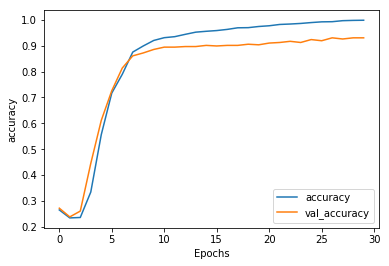

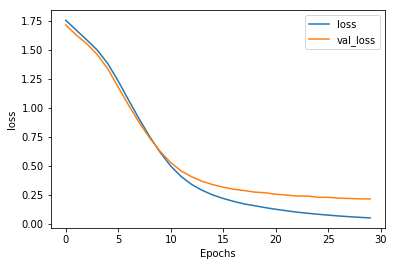

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [23]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [24]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [25]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

# Course 3 Week 3

In [6]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# sarcasm.json
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
with open('../Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
training_size = int(len(sentences)*0.7)
vocab_size = 10000
#vocab_size = 1000
embedding_dim = 16
#max_length = 120
max_length = 64
trunc_type = 'post'
oov_tok = '<OOV>'

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [8]:
'''Building a classifier for the sarcasm dataset'''

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                                truncating = trunc_type) #padding = padding_type,
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                               truncating = trunc_type) #padding = padding_type,


In [9]:
'''存在数据格式报错'''
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [17]:
'''implementing LSTMs in code'''

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#vocab_size = 1000
#oov_tok = '<OOV>'
#tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 751,489
Trainable params: 751,489
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']
        )
num_epochs = 10
history = model.fit(training_padded,training_labels, epochs = num_epochs,
                   validation_data = (testing_padded, testing_labels))

Epoch 1/10
585/585 [==============================] - 108s 171ms/step - loss: 0.4938 - accuracy: 0.7317 - val_loss: 0.3330 - val_accuracy: 0.8549
Epoch 2/10
585/585 [==============================] - 94s 161ms/step - loss: 0.2068 - accuracy: 0.9221 - val_loss: 0.3599 - val_accuracy: 0.8485
Epoch 3/10
585/585 [==============================] - 96s 164ms/step - loss: 0.1162 - accuracy: 0.9602 - val_loss: 0.4631 - val_accuracy: 0.8399
Epoch 4/10
585/585 [==============================] - 97s 165ms/step - loss: 0.0610 - accuracy: 0.9800 - val_loss: 0.5020 - val_accuracy: 0.8410
Epoch 5/10
585/585 [==============================] - 96s 165ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.6020 - val_accuracy: 0.8349
Epoch 6/10
585/585 [==============================] - 87s 149ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.6884 - val_accuracy: 0.8351
Epoch 7/10
585/585 [==============================] - 92s 158ms/step - loss: 0.0148 - accuracy: 0.9958 - val_loss: 0.8684 - val_a

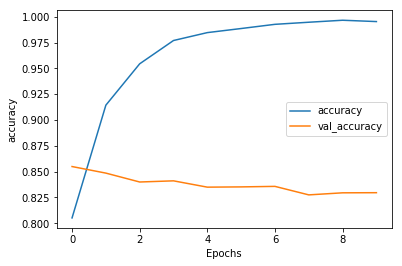

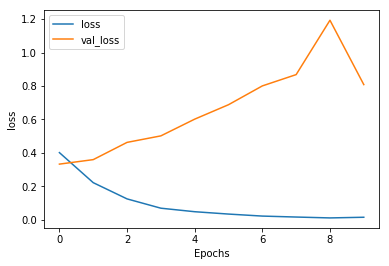

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
'''Gated Recurrent Units(GRU); CNN'''

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']
        )
num_epochs = 10
history = model.fit(training_padded,training_labels, epochs = num_epochs,
                   validation_data = (testing_padded, testing_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 128)               49920     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 698,241
Trainable params: 698,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
585/585 [==============================] - 56s 88ms/step - loss: 0.5371 - accuracy: 0.7101 - val_loss: 0.3345 - val_accuracy: 0.8537
Epoch 2/10
585/585 [==============================] - 55s 93ms/step - loss: 0.2038 - accuracy: 0.9207 

KeyboardInterrupt: 

# Course 3 Week 4

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequences = []
for line in corpus: #对语料库中的每个词进行循环
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)

max_sequences_len = max([len(x)] for x in input_sequences)

#将input_sequences改成numpy array
input_sequences = np.array(pad_sequences(input_sequences,maxlen = max_sequences_len[0],padding = 'pre'))

#将数据整理成 X 和 y
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [18]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [22]:
#model = Sequential()
#model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
#model.add(Bidirectional(LSTM(20)))
#model.add(Dense(total_words, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(xs, ys, epochs=500, verbose=1)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length = max_sequences_len[0]-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words, activation = 'softmax'),
    
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 500, verbose = 1)

Epoch 1/500
15/15 [==============================] - 4s 15ms/step - loss: 5.5693 - accuracy: 0.0090
Epoch 2/500
15/15 [==============================] - 0s 15ms/step - loss: 5.5483 - accuracy: 0.0548
Epoch 3/500
15/15 [==============================] - 0s 15ms/step - loss: 5.5052 - accuracy: 0.0208
Epoch 4/500
15/15 [==============================] - 0s 16ms/step - loss: 5.3534 - accuracy: 0.0195
Epoch 5/500
15/15 [==============================] - 0s 14ms/step - loss: 5.1484 - accuracy: 0.0515
Epoch 6/500
15/15 [==============================] - 0s 11ms/step - loss: 5.1152 - accuracy: 0.0529
Epoch 7/500
15/15 [==============================] - 0s 15ms/step - loss: 5.0889 - accuracy: 0.0452
Epoch 8/500
15/15 [==============================] - 0s 14ms/step - loss: 5.0045 - accuracy: 0.0528
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9668 - accuracy: 0.0640
Epoch 10/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9551 - accuracy: 0.0480


In [23]:
'''预测下一个词'''

seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequences_len[0]-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin round the plenty as red as a rose rose hall mchugh mavrone as mchugh mchugh wall dublin dublin dublin mchugh mavrone mavrone nelly the mccarthy hall mchugh all mad at me to call call give lanigans ball lanigans ball ball up lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans ball lanigans


In [25]:
'''write poetry w/ song lyrics'''


data = open('lyrics.txt').read()


In [ ]:
'''以下代码尚未运行210313'''


model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

# course 4 sequences, time series and prediction

In [ ]:
'''
video：train，validation and test sets

现有数据作为train和validation数据库，使用未来数据作为test dataset
metrics for evaluating performance
1. mse
2. rmse
3. mae
4. mape

'''

The next code block will set up the time series with seasonality, trend and a bit of noise. 

也许之后可以借用下方的一些function

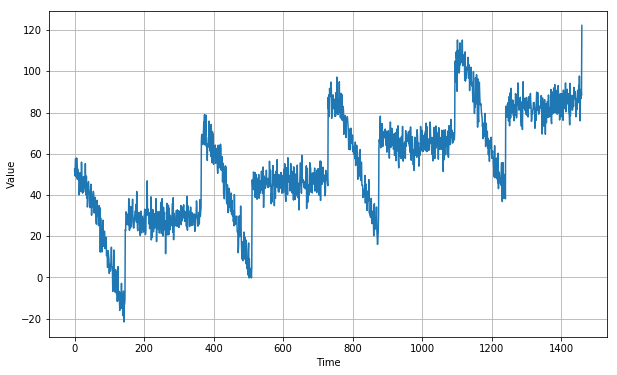

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Now that we have the time series, let's split it so we can start forecasting

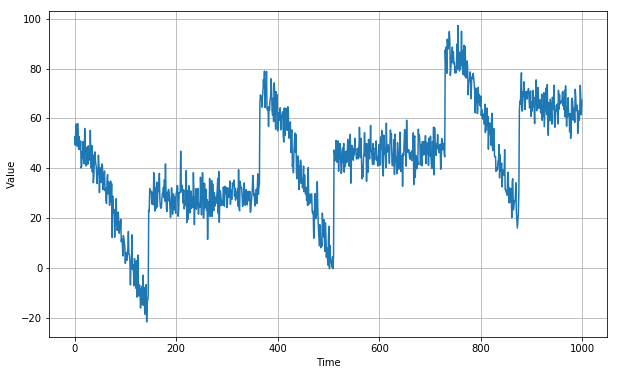

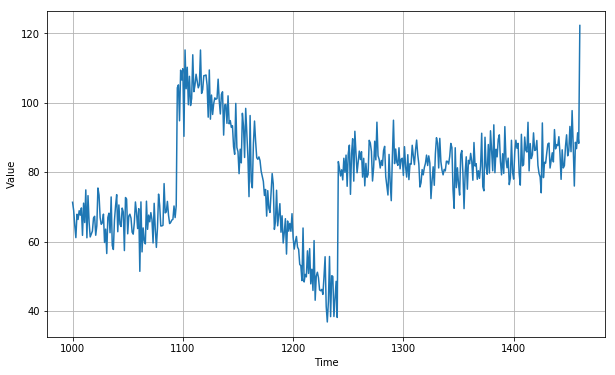

In [6]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# Naive Forecast

In [7]:
naive_forecast = series[split_time - 1:-1]

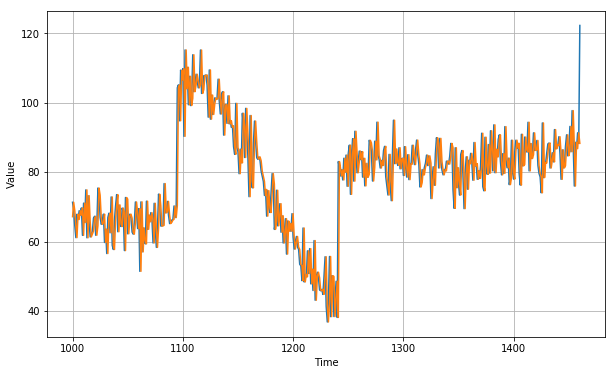

In [8]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

Let's zoom in on the start of the validation period:

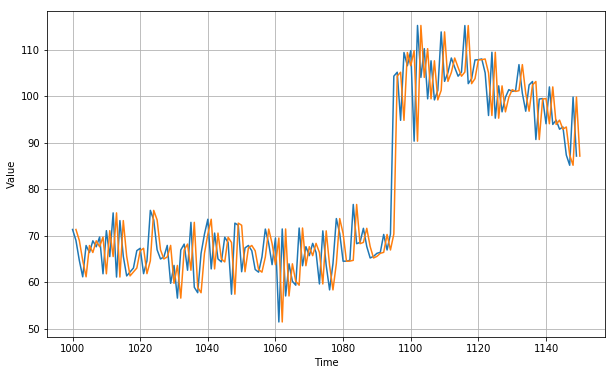

In [9]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [ ]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

That's our baseline, now let's try a moving average:

In [ ]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

In [ ]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [ ]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 365 days, we will subtract the value at time *t* – 365 from the value at time *t*.

In [ ]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

In [ ]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

Now let's bring back the trend and seasonality by adding the past values from t – 365:

In [ ]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [ ]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

In [ ]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [ ]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

# Course 4 Week 2

In [1]:
import tensorflow as tf

dataset = tf.data.Dataset.range(10)
for val in dataset:
    print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [2]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift = 1, drop_remainder = True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end = ' ')
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [10]:
dataset = tf.data.Dataset.range(20)
dataset = dataset.window(5, shift = 1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size = 20) #此处使用的buffer size等同于数据量
for x, y in dataset:
    print(x.numpy(), 
          y.numpy())

[3 4 5 6] [7]
[11 12 13 14] [15]
[14 15 16 17] [18]
[5 6 7 8] [9]
[10 11 12 13] [14]
[15 16 17 18] [19]
[0 1 2 3] [4]
[ 8  9 10 11] [12]
[6 7 8 9] [10]
[12 13 14 15] [16]
[ 7  8  9 10] [11]
[ 9 10 11 12] [13]
[4 5 6 7] [8]
[13 14 15 16] [17]
[1 2 3 4] [5]
[2 3 4 5] [6]


In [8]:
dataset = tf.data.Dataset.range(20)
dataset = dataset.window(5, shift = 1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size = 20) #此处使用的buffer size等同于数据量
dataset = dataset.batch(5).prefetch(1) #batch the data into set of x number.
for x, y in dataset:
    print('x = ', x.numpy(), 
          'y = ', y.numpy())

x =  [[ 2  3  4  5]
 [ 9 10 11 12]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [13 14 15 16]] y =  [[ 6]
 [13]
 [ 8]
 [12]
 [17]]
x =  [[ 0  1  2  3]
 [ 7  8  9 10]
 [ 1  2  3  4]
 [ 3  4  5  6]
 [11 12 13 14]] y =  [[ 4]
 [11]
 [ 5]
 [ 7]
 [15]]
x =  [[ 5  6  7  8]
 [12 13 14 15]
 [ 6  7  8  9]
 [15 16 17 18]
 [14 15 16 17]] y =  [[ 9]
 [16]
 [10]
 [19]
 [18]]
x =  [[10 11 12 13]] y =  [[14]]


## sequence bias

Sequence bias is when the order of things can impact the selection of things. For example, if I were to ask you your favorite TV show, and listed "Game of Thrones", "Killing Eve", "Travellers" and "Doctor Who" in that order, you're probably more likely to select 'Game of Thrones' as you are familiar with it, and it's the first thing you see. Even if it is equal to the other TV shows. So, when training data in a dataset, we don't want the sequence to impact the training in a similar way, so it's good to shuffle them up. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0-dev20210313


In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0): #slope = 0: 如果后面没有给出数值，则使用此处的默认值。
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [21]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights [array([[-3.6546305e-02],
       [-1.0586195e-03],
       [ 1.7888371e-02],
       [-1.3420629e-02],
       [ 1.4805171e-02],
       [ 2.3008013e-02],
       [ 2.3647850e-02],
       [ 2.4622666e-02],
       [-9.3584850e-02],
       [ 6.7402773e-02],
       [ 2.2808926e-02],
       [ 9.0598624e-06],
       [-8.4996648e-02],
       [-2.3157094e-02],
       [ 2.4389798e-02],
       [ 1.3882065e-01],
       [ 9.0512387e-02],
       [ 1.0729798e-01],
       [ 2.9847082e-01],
       [ 4.1034487e-01]], dtype=float32), array([0.02093114], dtype=float32)]


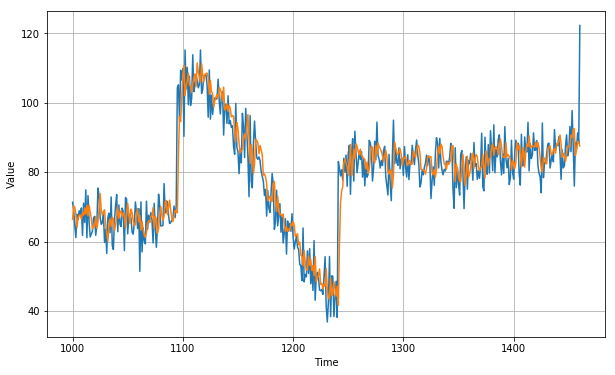

In [22]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [23]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.1324263

## Deep neural network training, tuning and prediction

In [24]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = [window_size], activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse', optimizer = tf.keras.optimizers.SGD(lr = 1e-6, momentum = 0.9))
model.fit(dataset, epochs = 100, verbose = 0)





/home/xiucatwithmark/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:382: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.1324263

In [32]:
#设置一个learning rate shceduler：lr逐渐变大

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape = [window_size], activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch/20))

optimizer = tf.keras.optimizers.SGD(lr = 1e-8, momentum = 0.9)
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['accuracy'])
history = model.fit(dataset, epochs = 100, callbacks = [lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 1416.3411 - accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 1s 9ms/step - loss: 1264.5995 - accuracy: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 1102.0586 - accuracy: 0.0000e+00
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 890.0853 - accuracy: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 1s 8ms/step - loss: 701.3867 - accuracy: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 528.5006 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 398.1556 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 0s 6ms/step - loss: 284.6321 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 1s 5ms/step - loss: 195.4468 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [==============================] 

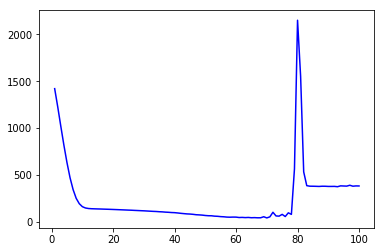

In [39]:
loss = history.history['loss']
#epochs = range(len(accuracy))
epochs = range(1,101)
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.show()

# Week 3

In [1]:
# outputting a sequence